# Homework 7 Problem 1

## Luke Meiler

### Getting the Data

We want to analyze a set of methane data using Fast Fourier Transforms (FFT). Our last data set was a little bit of a hassle to use for this exercise, so we've switched to a set of monthly data from the mlo surface station. First, we need to get this data. As usual, we start with a series of import statements, and the process is the same as for the last homework.

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import math

In [2]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [9]:
# data = np.genfromtxt(fname='ch4_crv_tower-insitu_1_ccgg_HourlyData.txt',
# usecols=(7,8,9),delimiter=' ', skip_header = 199,
#                      missing_values = "-99.99")
# type(data)

data = np.genfromtxt(fname='ch4_mlo_surface-insitu_1_ccgg_MonthlyData.txt',
                     usecols=(7, 8, 9), delimiter=' ', skip_header=143,
                     missing_values="-999.99")
type(data)

numpy.ndarray

In [10]:
def get_vals(data):
    """This function takes the data set generated from the
    numpy genfromtxt function of the three desired columns
    and returns a list of three lists: the times, CH4 levels,
    and uncertainties.

    Parameters:

    data: numpy.ndarry

        The set of data that you wish to rearrange into a list of its
        columns in each list.

    Returns:

    master_list: list

        A list containing a list for each column in the inputed data set
        with the elements of said column.

    """
    x_list = []
    y_list = []
    err_list = []
    master_list = []
    for i in data:
        x_list.append(i[0])
        y_list.append(i[1])
        err_list.append(i[2])
    master_list.append(x_list)
    master_list.append(y_list)
    master_list.append(err_list)
    return master_list

### Analyzing the Data

Now that we have the data in a workable form, we are going to take the FFT of the data. We then want to find the frequency of the periodic behavior seen in the data, so we make use of numpy's fft function, as well as the fft.freq function. These will take the FFT of the data and give the frequency space that we want to plot.

In order to use the fft.freq function, we need to give it the sampling space. This is the inverse of the sampling rate, which we've given as the total number of samples divided by the number of months. This should give the rate in 1 / months, and the sampling space in months.

In [12]:
data_list = get_vals(data)
x_data = data_list[0]
y_data = data_list[1]
err_data = data_list[2]

x_dataNP = np.array(x_data)

y = np.fft.fft(y_data)
y_max = np.amax(y)
y_ind = np.argmax(y)

y_length = len(y)

# Number of samples per year
total_samples = y_length
total_years = 33
total_months = total_years * 12
total_hours = total_years * 8760
sample_rate = total_samples / total_months
sample_spacing = 1 / sample_rate

freq = np.fft.fftfreq(y_length, sample_spacing)

# print(y_ind, y_max, freq)
print(sample_spacing)

0.9777777777777777


We see that the sampling space is approximately one month. It is not exactly 1 because some data points were removed.

### Plotting the FFT

Now we can again make use of matplotlib to plot the data set and its fourier transform.

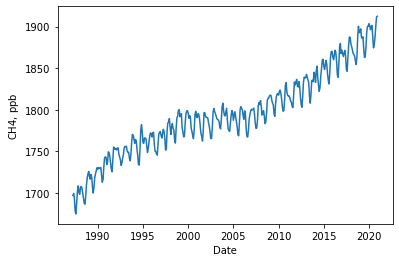

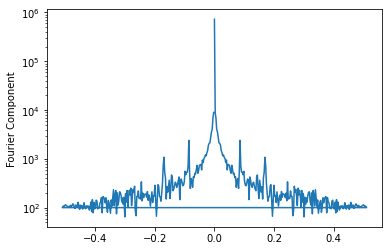

In [17]:
x = x_dataNP - 2015
Y_abs = abs(y)

f1 = plt.figure(1)
plt.plot(x_data, y_data)
plt.ylabel('CH${4}$, ppb')
plt.xlabel('Date')
# plt.xlim(2000,2005)

f2 = plt.figure(2)
plt.plot(freq, Y_abs)
plt.yscale('log')
plt.ylabel('Fourier Component')
# plt.xlim(0.000001,0.5)
plt.show()

Upon inspection of the first plot, we see that there is a periodic behavior about once a year, and a small secondary periodic behavior twice a year on top of that. We can then see this frequency in the FFT plot as the peaks at about $0.1$ and $0.2$, respectively.

We can then find these peaks using numpy's argmax function.

In [19]:
sort_freq = np.sort(freq)
y_sort = np.sort(y)
y_sort_flip = np.flip(y_sort)
y_sort_trunc = y_sort_flip[0:10]

# print(y_sort_flip)
print(y_sort_trunc)

[7.26878890e+05   +0.j         1.48444002e+03-1898.88333927j
 1.48444002e+03+1898.88333927j 9.50671082e+02+8920.05349399j
 9.50671082e+02-8920.05349399j 3.38314896e+02-1032.03401159j
 3.38314896e+02+1032.03401159j 2.89982626e+02 -643.9882604j
 2.89982626e+02 +643.9882604j  2.52464858e+02+2137.32254441j]


We can see the values of these 5 main peaks here. Two of these are reflected across the 0 point and so are meaningless, as is the point at 0. This just corresponds to the large amount of non-periodic behavior in the plot. Now we can find the values of these frequencies. We use a sorting method referenced from [kite](https://www.kite.com/python/answers/how-to-find-the-n-maximum-indices-of-a-numpy-array-in-python) in this cell.

In [24]:
n = 7
indices = (-y).argsort()[:n]
print(indices)


def getFreq(frequency_list, index_list):
    """ This function takes two lists: one of the set that you
    want to find the values from, and one containing the
    indices at which you want the values from the first list.

    Parameters:

    frequency_list: list

        The list that the desired values are contained in

    index_list: list

        The list containing the indices for the desired values of
        the frequency list.


    Returns:

    freq_return: list

        A list containing the values from frequency_list at the
        indices contained in index_list
    """
    freq_return = []
    for i in index_list:
        freq_return.append(frequency_list[i])
    return freq_return


frequencies = getFreq(freq, indices)
print(frequencies)

[  0 371  34   1 404 338  67]
[0.0, -0.08585858585858587, 0.08585858585858587, 0.0025252525252525255, -0.0025252525252525255, -0.1691919191919192, 0.1691919191919192]


This second list shows the two main frequencies that we were looking at earlier. The $0.085$ is the peak at approximately at $0.1$, and the $0.169$ is the peak we saw near $0.2$